## <center>Домашнее задание <a class="anchor" id="practice"></a><center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
X

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [4]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [5]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

In [6]:
X_st = X.copy()
X_st[:, 2] = standard_scale(X[:, 2])

In [7]:
X_st

array([[ 1.        ,  1.        , -0.97958969,  1.        ],
       [ 1.        ,  1.        , -0.56713087,  1.        ],
       [ 1.        ,  2.        , -0.46401617,  2.        ],
       [ 1.        ,  5.        , -0.77336028,  1.        ],
       [ 1.        ,  3.        ,  0.97958969,  2.        ],
       [ 1.        ,  0.        , -0.36090146,  1.        ],
       [ 1.        ,  5.        ,  1.08270439,  3.        ],
       [ 1.        , 10.        ,  2.11385144,  3.        ],
       [ 1.        ,  1.        , -1.08270439,  1.        ],
       [ 1.        ,  2.        ,  0.05155735,  2.        ]])

1. *Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [8]:
# Функция коррекции значений Y

def optimize(array):
    for i in range(len(array)):
        if array[i] == 1:
            array[i] -= 1e-10
        if array[i] == 0:
            array[i] += 1e-10
    return array

In [9]:
def calc_logloss(y, y_pred):
    y_pred = optimize(y_pred)
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [10]:
y1 = np.array([1, 0])
y_pred1 = np.array([0.8, 0.1])
calc_logloss(y1, y_pred1)

0.164252033486018

In [11]:
y1 = np.array([1, 0])
y_pred2 = np.array([1, 0.1])
calc_logloss(y1, y_pred2)

0.052680257878913145

In [12]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [13]:
z = np.linspace(-10, 10, 101)

In [14]:
probabilities = sigmoid(z)

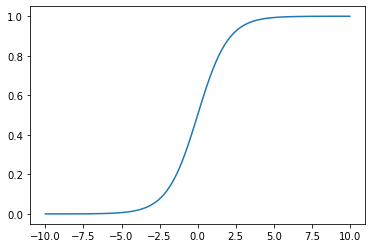

In [15]:
plt.plot(z, probabilities)
plt.show()

Logistic Regression

In [16]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [17]:
W = eval_model(X_st, y, iterations=500, eta=1e-4)

0 [ 0.49667621 -0.13840939  0.6476858   1.52297324] 1.1785958344356262
50 [ 0.494784   -0.14564801  0.6475462   1.52014828] 1.1657985749255426
100 [ 0.49290109 -0.15285535  0.64740132  1.51733474] 1.1531112685708473
150 [ 0.49102761 -0.16003088  0.64725118  1.51453281] 1.1405352753305018
200 [ 0.48916364 -0.16717404  0.64709581  1.51174267] 1.1280719326917483
250 [ 0.48730929 -0.17428428  0.64693524  1.50896452] 1.1157225565960736
300 [ 0.48546465 -0.18136107  0.64676951  1.50619853] 1.103488442622439
350 [ 0.48362982 -0.18840385  0.64659868  1.5034449 ] 1.0913708674192037
400 [ 0.48180488 -0.19541206  0.64642281  1.50070383] 1.0793710903721336
450 [ 0.47998993 -0.20238516  0.64624195  1.49797551] 1.0674903554915993


2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.


In [18]:
W = eval_model(X_st, y, iterations = 1000000, eta=1e-2)

0 [ 0.49292028 -0.15277306  0.64741473  1.51736839] 1.1785958344356262
100000 [-10.74422681  -1.38394757  -2.42072331   9.13384372] 0.23214322359658152
200000 [-15.42679328  -1.78134692  -3.82858948  12.91701174] 0.1934348346307079
300000 [-19.03150907  -2.10012516  -4.88443547  15.84670999] 0.17055146995100195
400000 [-21.99842872  -2.36612534  -5.74168121  18.25878427] 0.15508554731463034
500000 [-24.52628686  -2.59421335  -6.46566094  20.31253756] 0.14388121210374644
600000 [-26.73372711  -2.79394735  -7.09411669  22.1041858 ] 0.13535231479480891
700000 [-28.69813429  -2.97178944  -7.65112172  23.69672629] 0.12860865529836246
800000 [-30.47262939  -3.13227681  -8.15292479  25.1334773 ] 0.12311380435100641
900000 [-32.09509554  -3.27869771  -8.61095949  26.4453599 ] 0.11852638259726415


Если увеличиваю количество итераций лог лосс постоянно уменьшается. Остановился на этих параметрах

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).


In [19]:
def calc_pred_proba(W, X):
    p = []
    for i in range(len(X)):
        j = np.dot(W, X[i])
        p.append(sigmoid(j))
    return p

In [20]:
y_pred_proba = calc_pred_proba(W, X_st)
y_pred_proba

[0.3769298124351792,
 0.014363978270979369,
 0.9999999948360638,
 1.1035319005757482e-07,
 0.932591452135089,
 0.06428131854808931,
 0.9999999998347937,
 0.020662021356039176,
 0.6056087403128808,
 0.999999455889253]

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [21]:
def calc_pred(W, X):
    preds = []
    for i in range(len(X)):
        j = np.dot(W, X[i])
        j = sigmoid(j)
        if j >= 0.5:
            preds.append(1)
        if j < 0.5:
            preds.append(0)
    return preds

In [22]:
y_pred = calc_pred(W, X_st)
y_pred

[0, 0, 1, 0, 1, 0, 1, 0, 1, 1]

5. *Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.

In [23]:
y_real = np.array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0])
y_preds = np.array([1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [24]:
def accuracy(y, y_pred):
    trues = 0
    for i in range(len(y)):
        if y[i] == y_pred[i]:
            trues += 1
    return trues / len(y)

In [25]:
acc = accuracy(y_real, y_preds)
acc

0.56

In [26]:
def matrix(y, y_pred):
    matrix = np.zeros(4). reshape(2, 2)
    for i in range(len(y)):
        if y[i] == 1 and y_pred[i] == 1:
            matrix[0][0] += 1
        if y[i] == 0 and y_pred[i] == 1:
            matrix[0][1] += 1
        if y[i] == 1 and y_pred[i] == 0:
            matrix[1][0] += 1
        if y[i] == 0 and y_pred[i] == 0:
            matrix[1][1] += 1
    return matrix

In [27]:
mat = matrix(y_real, y_preds)
mat

array([[9., 5.],
       [6., 5.]])

In [28]:
def precision(matrix):
    return (matrix[0][0] / (matrix[0][0] + matrix[0][1]))

In [29]:
prec = precision(mat)
prec

0.6428571428571429

In [30]:
def recall(matrix):
    return (matrix[0][0] / (matrix[0][0] + matrix[1][0]))

In [31]:
rec = recall(mat)
rec

0.6

In [32]:
def f1_score(b, precision, recall):
    return ((1 + b**2) * ((precision * recall) / (b**2 * precision + recall)))

In [33]:
f1 = f1_score(0.8, prec, rec)
f1

0.6254237288135593

6. Могла ли модель переобучиться? Почему?

Думаю, что модель переобучается, т.к. лог лосс постоянно уменьшается и таким образом может дойти до нуля.
То есть необходим подобрать параметры с допустимой ошибкой.